# FCN & MLModel Guide

## Table of Contents <a class="anchor" id="0"></a>
* [Preface](#1) 
* [1 — Fully Connected Network Model (FCN)](#2) 
    * [Data Preprocessing for FCN Model ](#3) 
    * [FCN Model Initialization](#4) 
    * [Learning Rate Search](#5) 
    * [FCN Model Training](#6) 
    * [FCN Model Validation metrics, Saving & Loading](#7) 
    * [FCN Model Inferencing](#8)   
* [2 — Machine Learning Model (MLModel)](#9) 
    * [Data Preprocessing for MLModel ](#10) 
    * [ML Model Initialization](#11) 
    * [ML Model Training, Saving & Loading](#12) 
    * [ML Model Inferencing ](#13) 
    * [Model Selection](#14) 
* [FCN vs. ML comparison](#15) 

## Preface <a class="anchor" id="1"></a>
<p style='text-align: justify;'>The FCN and MLModel frameworks are recently added modules in arcgis.learn that can handle data preparation and model tabular data using deep learning and machine learning algorithms respectively. These models can be trained with features and features with Rasters data while inferencing can happen on feature data, feature with Rasters, or just rasters. The two methodology for modelling are as follows:</p>

<p style='text-align: justify;'>1.	Fully Connected Network(FCN) – This is a deep learning framework called FullyConnectedNetwork available in the arcgis.learn module in ArcGis API for Python, and is based on TabularLearner from FastAI </p>


<p style='text-align: justify;'>2.	Machine Learning Model(MLModel) - In the second option any machine learning algorithm from scikit learn can be implemented via the MLModel framework available in arcgis.learn. This framework can deploy any ML algorithm from the scikit learn library just by passing the name of the algorithm and its relevant parameters as keyword arguments. This tool makes it possible for model selection utlilizing the several machine learning models available in scikit learn by  comparing the model accuracies.</p>

## 1 — Fully Connected Network Model (FCN) <a class="anchor" id="2"></a>
This is an Artificial Neural Network model from the arcgis.learn module which is described here.

Its main components are:

| Method | Description |
| -| - |
| prepare_tabulardata()| prepare data including imputation, normalization and train-test split  
| FullyConnectedNetwork()| fit a fully connected neural network to a data  
| model.lr_find()| find an optimal learning rate  | 
| model.fit() | train a model with epochs & learning rate as input  |
| model.score() | find the model metric of r-square for regression models and accuracy for classification models  |FullyConnectedNetwork model 
| model.predict() | predict on a test set |

### Data Preprocessing for FCN Model<a class="anchor" id="3"></a> 
<p style='text-align: justify;'>The data processing involves preparing the tabular data for input to this supervised learning algorithm. First a list is made consisting of the feature data that will be used for predicting the dependent variable. By default it will receive continuous variable, while in case of a categorical variable the *True* value should be passed inside a tuple along with the variable.</p>

For example if *n* predictors are used and one is categorical and the other continuous then:

*`step1: X = ["Field_1", ("Field_2", True),......."Field_n"]`*

Here Field_2 is treated as categorical and the others as continuous variables

Again in case these variables are stored as mulitple rasters then 

*`step1: explanatory_rasters = [RasterClassObject1,(RasterClassObject2, True),.......RasterClassObjectn]`* .

Here RasterClassObject2 is treated as categorical and the others as continuous variables

Once the explanatory variables are identified the main preprocessing of the data will be carried out by the [prepare_tabulardata](https://developers.arcgis.com/python/api-reference/arcgis.learn.html#prepare-tabulardata) method from the arcgis.learn module in the ArcGIS API for Python. The method takes the feature layer or a spatial dataframe containing the dataset and prepares it for fitting the model.
The main input parameters required for the tool are:
- `input_layer`: feature layer or spatial dataframe having the primary dataset
- `variable_predict`: : field name containing the y-variable from the input feature layer/dataframe
- `explanatory_variables` : list of the field names as 2-sized tuples containing the explanatory variables in the featurelayer mentioned above.
- `explanatory_rasters` : list of the field names as 2-sized tuples containing the explanatory variables in multiple input rasters as mentioned above.

Foe example the final format would be as follows:

<span style='color:Green'>**from**</span> arcgis.learn <span style='color:Green'>**import**</span> prepare_tabulardata

 *`step2: data = prepare_tabulardata(input_feature,  variable_predict,  explanatory_variables=X or explanatory_rasters=explanatory_rasters)`*


Different ways and types of input data : The basic way to input data is to create a Feature Layer Object or a spatially enabled dataframe object with all the features and the dependent variable as its attribute. Here either the variables could be either continuous or categorical which has to be specified in the list. Also the feature layer could either be a point layer or a polygon layer.

Then the variable predict or the y-variable could be in a feature layer, which can be a point or a polygon while for the predictors there could be multiple rasters layers each for one predictor, in which cases it can handle different cell sizes, spatial references and different extents.

*Handling Different Cell Sizes* - Currently It can handle different cell sizes among the input batch of explanatory rasters for training and as well different cell sizes of the predicting rasters in the predicing set for inferencing. It means that the cell sizes of the different explanatory rasters might be different, thus while training in case of point features the exact pixel value underneath the points are extracted and used, and in case of input polygon feature layers it takes the mean of cells in case of continuous and majority in case of categorical from the explanatory rasters. In the next version It would be enhanced to min, max, sum, unique etc of the raster cells.

Now once the model is trained using a set of rasters with respective cell sizes for the different input layers, during inferencing it will convert all rasters to the minimum cell size in the predicting set and then pick up the respcetive cell values for final prediction.

*Handling spatial reference* - During training it will convert all the raster points or distance feature points to the spatial reference system of the input feature layer. Similarly while predicting all raster layers to be used are transformed and read to a  spatial reference system of one of the raster layer or spatial reference of the input feature layer.

**`variable_predict`** – Here just the field name of the variable is to be passed. It would automatically deduce the data type of whether continuous or categorical based on the fact that if the value is a float and the field has more than 20 unique values then it would be regarded as continuous whereas if the value is not float and has less than 20 unique values then it would be considered as categorical.

*Specifying data type in explanatory vs variable predict* : Now although the data type is automatically deduced for *variable_predict*, however in case of *explanatory variables* it has to be mentioned by the user, since this is handled internally based on certain factors. In fastai, it only allows a field with few unique values to be considered as a classification case , otherwise it treats it as a regression case. In addition this also provides a check for data types of fields. 


**`explanatory_variables`** – In case of explanatory variables similarly, the field name must be passed. While it would deduce continuous variables by default, and just the string name of the field is sufficient. But as mentioned above for a categorical variable the field name along with a *True* value is to be passed in a tuple within the list of the explanatory variables.  

For variables that are used for prediction there could be a case where in the training data there is not much variance for a field, for example the altitude variable in the solar sample, so it could be incorrectly considered as categorical instead of continuous. Thus it is left to the user, and is not deduced  automatically internally . But if a user specifies a float column as categorical, there are internal checks to handle it, and in which case it will give a warning. 

In summary: By default not passing anything means treating it as continuous, True means Categorical.
If a Float field is passed as Categorical, it will check and say that it is treating it as continuous.
If a field with more than 20 unique values is passed as Categorical, it will show a warning to check if it is correctly marked as categorical.


**`explanatory_rasters`** – This is used when the explanatory variables are in multiple raster layers rather than feature layes. The same format as discussed for the explanatory variables applies for the *explanatory_rasters*. First each of the raster layer is to be loaded in the notebook using the **Raster** method, by storing then in repsective variables. These variables could then be used to create the *`explanatory rasters`* list using the norm explained above, and eventually passed as input to the *`prepare_tabulardata`* method.     

**`date_field`** – The datefield if it is mentioned, are always split into its day, month, year component as columns and added as predictors. It would take both the format of string and datetime column.  Suppose input features can have field A, B, C, D, E, F, X, where the fields A,B, C and are used as the variables to predict X. Here D is the date field. Thus in explanatory variables it can be specified as  [A, B, (C, True)], variable_to_predict = X.

If the user wants to split field D and add the components as the predictors then is mentioned as date_field=D.
If the user don't want to use field D then it is not required to be specified anywhere. Again If the user wants to use date field without splitting into its day, month, year component then it could just passed in the list. Ideally, including the datetime field would be appropriate only if it split and added as predictor, other than special cases. 


**`distance_features`** – Both Feature Layer Object and Spatially Enabled Dataframe Object can be used as input features, however if the prepare data requires creating distance features then only a feature layer object needs to be used . A Featue Layer Object, usually refers to the data source (Arcgis Online, or local disk) and returns data. There are different operations you can perform on Feature Layer.

Spatially Enabled Dataframe has dataframe object loaded in memory and a spatial reference object. Each row in the dataframe is a Feature, thus Spatial Dataframe is actually derived from Feature Layer, hence a subset of Feature Layer,, and in that case when we use the distance feature , it can calculate the distance both in case of the feature layer object and as well the spatially enabled dataframe. However here the model is using Arcgis network tools for calculating distances, which would only work with feature layer object.
Then the nearest_dist1, nearest_dist2 are different distance from different features
However if distance feature is not required a pandas dataframe can also be used as input here


### FCN Model Initialization<a class="anchor" id="4"></a>  

Once the data has been prepared by the prepare_tabulardata method it is ready to be passed to the ANN for training. The ANN is known here as the FullyConnectedNetwork and is imported from arcgsi.learn followed by initialization of the neural network as follows:

<span style='color:Green'>**from**</span> arcgis.learn <span style='color:Green'>**import**</span> FullyConnectedNetwork

*`step3: fcn = FullyConnectedNetwork(data)`*

According to the default setting the initialization creates a deep neural network of two hidden layers with the first layer containing 500 nodes and a second layer having 100 nodes. The user can add their own configuration of layers by passing a list in the *layers* parameter, specifying the number of nodes for each layer as follows:

*`fcn = FullyConnectedNetwork(data, layers=[200, 300])`*

It will represent two hidden layers with nodes 300 and 200 respectively.

`Emb_szs` –  Usually categorical fields are transformed to numerical type by one-hot encoding or embedding. Here embedding is used where once the size of the embedding is mentioned in the `Emb_szs` it will transform the categories into numeric. This is used only for categorical variables.

### Learning Rate Search<a class="anchor" id="5"></a>

The initialized model would need a learning rate for training, and the *lr_find()* method is used for searching an optimal learning rate for passing it to the final model fitting as follows:

*`step4: fcn.lr_find()`*



The automatic lr_finder will return a learning rate taking a conservative estimate of the learning rate, but some expert can interpret the graph more appropriately and find a better learning rate to be used for final training of the model. In the figure below the suggested learning rate by the *lr_find* method was around 0.0002754. 


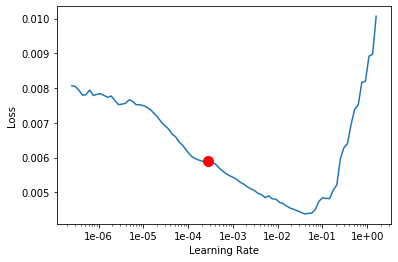

### FCN Model Training<a class="anchor" id="6"></a> 

Finally the model is now ready for training, and the *model.fit()* method is used which is given the number of epochs for training and the estimated learning rate selected based on the lr_find returned in the previous step:

*`step5: fcn.fit(100, lr=0.0002754)`*

This model will train for 100 epochs using the provided learning rate. If the learning rate is not mentioend then an optimal learning rate is automatically deduced for training the model.

Other important inputs are the two optional boolean parameters of *early_stopping* and *checkpoint*. The *early_stopping* parameter by default is set to `False`, but if set to `True` it will stop the training if validation loss stops improving for 5 epochs. The *checkpoint*  parameter can be used to save the best model during training, which if set to `True`, the best model based on validation loss will be saved during training.

### FCN Model Validation metrics, Saving & Loading<a class="anchor" id="7"></a> 

After training the train vs valid losses can be plotted using *`fcn.plot_losses()`* to check if the model is overfitting. For example the plot below shows that the model has trained well and though the losses are still gradually decreasing but not significantly, hence the model is ready and can be saved for inferencing.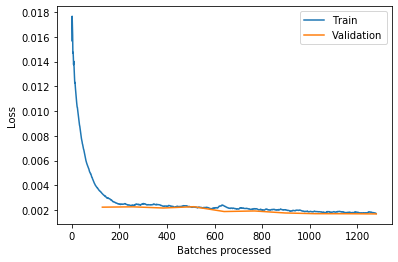
Finally the *`fcn.show_results()`* will print the training results with the prediction saved in the column named *prediction_results* of the dataframe and will let the user assess the prediction on the test set by the trained model. This can also be determined by the model metrics of the trained model which is estimated by the  *`fcn.score()`* method and returns R-square score for regression model and accuracy for classification model.

The trained model could now be saved using the *`model.save(name_or_path)`* command, which will save the model weights, creates an Esri Model Definition and Deep Learning Package zip for deployment to Image Server or ArcGIS Pro. For example
 
*`fcn.save(r'C:\2020\5-May\solar energy\saved_model\neural_net1', publish=True)`*

The publish parameter is an optional boolean which publishes the DLPK as an item in Arcgis portal. Another optional parameter is *framework*, which by default saves the model with a PyTorch backend(*framework='PyTorch'*). It can be used to also save the model  with a TF-ONNX backend(*framework='TF-ONNX'*).    

The saved model can be loaded back using *`fcn.from_model(emd_path, data=None)`* which will load the trained model from the provided *emd_path* and would be ready for inferencing. The *data* parameter is optional which requires a fastai Databunch returned  by the `prepare_tabulardata` function only for further training the model on a new dataset.

### FCN Model Inferencing<a class="anchor" id="8"></a>

The trained model or the loaded model could now be used for inferencing on a new dataset using the *`model.predict()`* method. This has been discussed in detail in the [ML Model Inferencing](#19) section, which also applies for inferencing by the FCN model. 

## 2 — Machine Learning Model (MLModel)<a class="anchor" id="9"></a> 
In the second methodology a machine learning model known as the MLModel framework from arcgis.learn. This framework could be used to import and apply any machine learning model from the scikit library on the prepared data processed by the prepare_tabulardata function from arcgis.learn.

Its main components are:

| Method | Description |
| -| - |
| make_pipeline()| used for serializing multiple operations 
| make_column_transformer()| transforms data using the selected scaling method
| prepare_tabulardata()| prepare data including imputation, normalization and train-test split  
| MLModel()| select the ML algorithm to be used for fitting 
| model.fit() | train a machine learning model with its parameters 
| model.score() | find the model metric of r-square for regression models and accuracy for classification models  
| model.predict() | predict on a test set 

It is be to be noted that most of the components for the implementation of the MLModel framework are similar to that of the FullyConnectedNetwork other than a few exceptions, which are the *make_pipeline()*, *make_column_transformer()* and the *MLModel()* methods. The *make_pipeline* and *make_column_transformer* are provided by sklearn and these two are used to create the *preprocessors* parameter in the *prepare_tabulardata* method for MLModel.

### Data Preprocessing for MLModel<a class="anchor" id="10"></a>  

As in case of *fcn* the first step consist of making a list of the explanatory variable, where continuous variable are accepted by default whereas for categorical variable the *True* value should be passed inside a tuple along with the variable.

*`step1: X = ["Field_1", ("Field_2", True),......."Field_n"]`*

Again in case these variables are stored as mulitple rasters then 

*`step1: explanatory_rasters = [RasterClassObject1,(RasterClassObject2, True),.......RasterClassObjectn]`* 



**`make_pipeline`** is used for applying some operations on the full dataset instead of individual columns. Thus instead of different scalers, if the whole dataset is to be scaled with a single scaling function then this can be framed as 

 *`step2: numerical_transformer = make_pipeline(MinMaxScaler())`* followed by using it as an input for the make_column_transformer  
 
 *`step3: preprocessors = make_column_transformer((numerical_transformer, X))`*
 
where X is the list of input columns. The preprocessors created from the above step would then be the input for the prepare_tabulardata method. The pipeline method could also be used for applying any number of steps like, step 1 -> step 2 -> step 3 and so on to the full dataset. For example the below line will first scale a dataset using a scikit learn scaler followed by applying a scikit learn model to the scaled dataset:

*`make_pipeline(StandardScaler(), GaussianNB(priors=None))`*


**`make_column_transformer`** is for applying column wise transforms steps, using which the user can select any scaler function from scikit learn for transforming the fields using the selected scaler. Suppose we want to use scaler1 on column c1 & c2, and scaler2 on c3 & c4, then we can use it as follows:

*`step3: preprocessors = make_column_transfomer((scaler1, [c1,c2]), (scaler2,[c3,c4]))`* 

Thus if there are both numerical and categorical fields in a dataset they can be scaled using different scalers. Also if the user wants to drop a column or to pass them through untransformed,  then use strings *`drop`*   and *`passthrough`* respectively instead of the scaler. It can also be used for applying multiple steps on each column like for column 1 - step 1 -> step 2 -> step 3 and then for column 2 - step 1 -> step 2 -> step 3.

Once the explanatory variables or the explantory rasters list is ready along with the *preprocessors* transformation,  these are now used as input for the *`prepare_tabulardata()`* method. The method takes the feature layer or a spatial dataframe containing the dataset and prepares it for fitting the model as follows:

<span style='color:Green'>**from**</span> arcgis.learn <span style='color:Green'>**import**</span> prepare_tabulardata

*`step4: data = prepare_tabulardata(input_feature,  variable_predict,  explanatory_variables=X, preprocessors=preprocessors)`*


Here most of the input parameter is similar to that as described for *fcn*, other than the preprocessors. The preprocessors as explained above contains information about data transformations. At this stage the *`data.show_batch()`* can be used for visualizing the data frame that is being used for the model. 

### ML Model Initialization<a class="anchor" id="11"></a> 

Once the data has been prepared by the *prepare_tabulardata* method it is ready to be passed to the selected machine learning model for training. Here for demonstration purpose the Gradient BoostingRegressor model from scikit learn is used which is passed into the MLModel function, along with its parameters . First the MLModel framework is imported from arcgis.learn and the model from scikit learn followed by defining the model along with the parameters as follows:

 <span style='color:Green'>**from**</span> arcgis.learn <span style='color:Green'>**import**</span> MLModel

*`step5: model = MLModel(data, 'sklearn.ensemble.GradientBoostingRegressor', n_estimators=100, random_state=43)`*

### ML Model Training, Saving & Loading<a class="anchor" id="12"></a>  

<p style='text-align: justify;'>Finally the model is now ready for training, and the *model.fit()* method is used for fitting the machine learning model with its defined parameters mentioned in the previous step.</p>

*`step6: model.fit()`*

The training results are printed using *model.show_results()* to assess the quality of the trained model and also compute model metrics. The *model.show_results()* will output a table where usually the last column will return the predicted values by the model on the test set. Comparing the predicted values with the actual target variable will give some indication of the performance of the trained model. Subsequently the model metrics of the trained model could be estimated using the *model.score()* function which currently returns the r-square.

The trained model could now be saved if the user is satisfied with its quality using the *model.save(name_or_path)* command, which will save a emd(Esri Model Definition) file of the trained model in the specified folder. It uses pickle to save the model, for example

*`model.save(r'C:\2020\5-May\solar energy\saved_model\solar_MLModel')`*

The saved model could then be loaded back using *`MLModel.from_model(emd_path, data=None)`* which will load the trained model. In case of inferencing the model can be loaded without any data and then used for prediction. However for further training the model on a new dataset for improving its performance it has to be loaded with the returned data object from the *prepare_tabulardata* function.

### ML Model Inferencing <a class="anchor" id="13"></a> 

The trained model could now be used to inference on a new dataset using the *model.predict()* method. The main parameter for the method is the list of explanatory variables for predicting or the predicting variables. Ideally, they should have identical field names as used in the training data, in which cases the predictors are automatically chosen from the input feature layer by the inferencing model without mentioning them explicitly. In case of different field names pointing the same variables, the *match_field_names* parameter is to be used, which is a dictionary that will map field names from prediction set to training set like this:

*`{"Field_Name_1": "Field_1", "Field_Name_2": "Field_2"}`* 

The next parameter is the *prediction_type*, which is by default set to 'features'. Therefore, only in case of raster output this must be set as raster like this: *`prediction_type='raster'`*      

Finally a *output_raster_path* has to be provided in case of raster prediction. While for publishing the output layer, *output_layer_name* parameter could be used.



Summarizing the above for **feature output** the *model.predict()* could be framed as follows:

*`model.predict(input_features, output_layer_name='prediction_layer')`* 

where *input_features* is a feature layer or spatial dataframe, and contains features with location and some or all fields required to infer the dependent variable value.


While for a **raster output** it could be as follows:

*`model.predict(explanatory_rasters = predict_rasters, prediction_type='raster', output_raster_path='folder_path/prediction.tif')`* 

where *explanatory_rasters* contains a list of raster objects containing some or all fields required to infer the dependent variable value. For example *`predict_rasters = [raster1, raster2, raster 3.....]`*  These could be also the same raster used for training that was sampled for a few selected points for training.

### Model Selection <a class="anchor" id="14"></a>

Here in the example we have used only one classifier model which is the gradient boosting classifier. As we know there are several other model available in scikit learn, and the *MLModel()* method provides the flexibility of choosing any one of them with its respective hyperparameters to initialize the model. Subsequently using model selection, the best model can be selected along with the optimal hyperparameters.  

## FCN vs. ML comparison<a class="anchor" id="15"></a>

Both the FCN and MLModel discussed above has their own set of pro and cons, and a brief comparison is as follows:

| FCN | MLModel |
| -| - |
| Usually requires large dataset| Performs well with comparitively less data 
| Returns different result for each run due to unique weight initialization | More stable than neural network. Always return the same result.
| It has some universal parameters for fine tuning, like number of hidden layers, learning rate, number of epochs, batch size etc | Several scikit learn models available, each need its own set of unique parameters & hyperparameters setting, followed by fine tuning. Must follow model selection for selecting the optimal model.


